In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
train_loss = np.array([5/(i+1) for i in range(200)])
val_loss = np.array([5/(i+1) for i in range(0, 200, 40)])
# info = {
#     stage: {
#         "batch": [i for i in range(200)],
#         "loss": loss / float(np.max(loss)),
#         "acc": [0.4*np.log10(i+1) for i in range(200)],
#         "dice": [0.25*np.log10(i+1) for i in range(200)],
#     } for stage in ["train", "val"]
# }

alt_names = {
    "loss": "Loss",
    "acc": "Accuracy",
    "dice": "Dice Score",
    "train": "Training",
    "val": "Validation",
}


info = {
    "train": {
        "batch": [i for i in range(200)],
        "loss": train_loss / float(np.max(train_loss)),
        "acc": [0.4*np.log10(i+1) for i in range(200)],
        "dice": [0.25*np.log10(i+1) for i in range(200)],
    },
    "val": {
        "batch": [i for i in range(0, 200, 40)],
        "loss": val_loss / float(np.max(val_loss)) * 1.3,
        "acc": [0.32*np.log10(i+1) for i in range(0, 200, 40)],
        "dice": [0.21*np.log10(i+1) for i in range(0, 200, 40)],
    }
}

df_list = []
for stage_name, stage in info.items():
    for metric_name, values in stage.items():
        if metric_name != "batch":
            stage_col = [alt_names[stage_name]] * len(values)
            metric_col = [alt_names[metric_name]] * len(values)
            df_list += list(zip(info[stage_name]["batch"], stage_col, metric_col, values))

df = pd.DataFrame(df_list, columns=[
    "Batch",
    "Stage",
    "Metrics",
    "Value",
])


In [8]:
# pd.melt(df, ["Batch"], var_name="Metrics")
df

,Batch,Stage,Metrics,Value
0,0,Training,Loss,1.000000
1,1,Training,Loss,0.500000
2,2,Training,Loss,0.333333
3,3,Training,Loss,0.250000
4,4,Training,Loss,0.200000
...,...,...,...,...
610,0,Validation,Dice Score,0.000000
611,40,Validation,Dice Score,0.338685
612,80,Validation,Dice Score,0.400782
613,120,Validation,Dice Score,0.437385


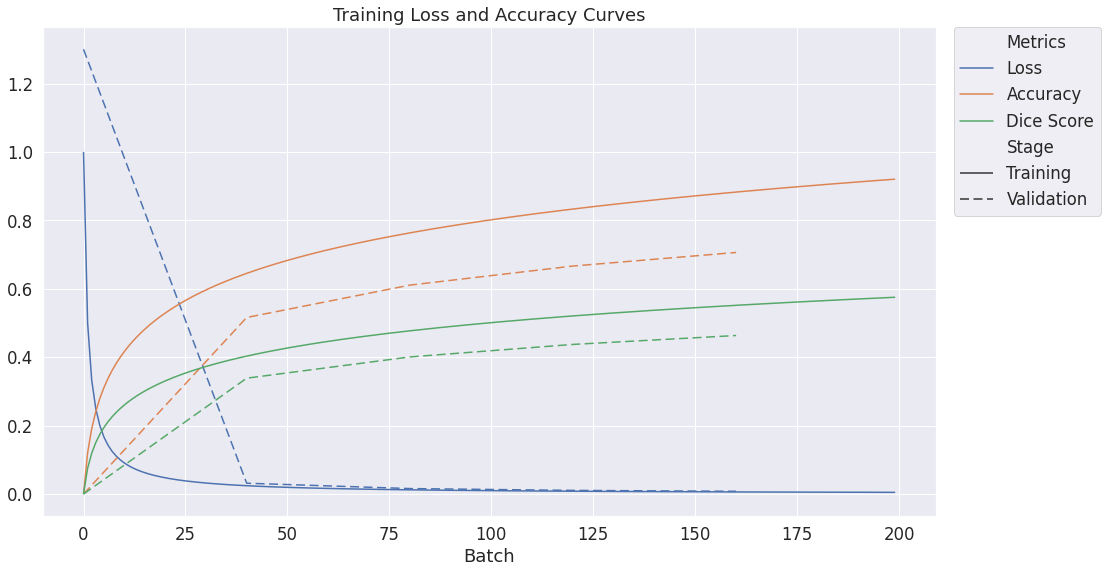

In [10]:
sns.set(
    rc={"figure.figsize": (16, 9)},
    font_scale=1.5,
)
a = sns.lineplot(x="Batch", y="Value", hue="Metrics", style="Stage", data=df, dashes=[(1,0),(6,3)])
a.set(ylabel=None)
plt.title("Training Loss and Accuracy Curves")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
# a.figure.savefig("testing.png")

In [ ]:
# fig, ax1 = plt.subplots() # initializes figure and plots
# ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis.

# sns.lineplot(x="Batch", y="value", hue="variable", data=pd.melt(df, ["Batch"]))

In [5]:
# import torch
# import torchmetrics
# from time import time

# a = torch.randint(0,80,(100,256,256)).cuda()
# b = torch.randint(0,80,(100,256,256)).cuda()

# start = time()
# print("manual accuracy:", (a == b).sum()/torch.numel(a))
# end = time() - start
# print(f"Done in {end}s")

# start = time()
# print("torchmetrics accuracy:" ,torchmetrics.functional.accuracy(torch.flatten(b), torch.flatten(a)))
# end = time() - start
# print(f"Done in {end}s")


/home/dkermany/.local/share/virtualenvs/BoneSegmentation-C6QGg7XR/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


manual accuracy: tensor(0.0125, device='cuda:0')
Done in 0.0023720264434814453s
torchmetrics accuracy: tensor(0.0125, device='cuda:0')
Done in 0.1241753101348877s


In [6]:
# one_hot_a = torch.nn.functional.one_hot(
#     a.long(),
#     num_classes=81,
# ).permute(0,3,1,2)
# one_hot_b = torch.nn.functional.one_hot(
#     b.long(),
#     num_classes=81,
# ).permute(0,3,1,2)

# start = time()
# print("manual IOU:" ,torch.logical_and(a,b).sum()/torch.logical_or(a,b).sum())
# end = time() - start
# print(f"Done in {end}s")

# start = time()
# print("torchmetric IOU:" ,torchmetrics.functional.jaccard_index(
#     a,
#     b,
#     num_classes=81,
#     ignore_index=0,
#     average="micro",
# ))
# end = time() - start
# print(f"Done in {end}s")

manual IOU: tensor(0.9753, device='cuda:0')
Done in 0.013720035552978516s
torchmetric IOU: tensor(0.0063, device='cuda:0')
Done in 0.12473893165588379s


In [9]:
# def iou(pred, y_true):
#     return (torch.logical_and(pred, y_true) + .1).sum() / (torch.logical_or(pred, y_true) + .1).sum()

In [11]:
# miou = 0.
# for n in range(81):
#     miou += iou(torch.flatten(one_hot_a[:,n,:,:]), torch.flatten(one_hot_b[:,n,:,:]))
# miou /= 81
# print(miou)

tensor(0.8047, device='cuda:0')


In [15]:
# a = [
#     (1,2,3),
#     (1,2,3),
#     (1,2,3),
#     (1,2,3),
#     (1,2,3),
# ]
# df = pd.DataFrame(a, columns=["batch", "loss", "mode"])
# df.to_csv("test.csv")